<a href="https://colab.research.google.com/github/Ndblaze/30DaysOfJavaScript/blob/master/Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Ndubuisi Eze




In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


In [83]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [84]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [85]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize and add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0    # Normalize and add channel dimension

# Define a CNN model with increased complexity
model_cnn = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model on the MNIST dataset
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8673 - loss: 0.4246 - val_accuracy: 0.9838 - val_loss: 0.0479
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9756 - loss: 0.0818 - val_accuracy: 0.9881 - val_loss: 0.0356
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9831 - loss: 0.0572 - val_accuracy: 0.9893 - val_loss: 0.0301
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9871 - loss: 0.0456 - val_accuracy: 0.9913 - val_loss: 0.0273
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 0.9919 - val_loss: 0.0235
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9895 - loss: 0.0332 - val_accuracy: 0.9913 - val_loss: 0.0248
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9923 - loss: 0.0268 - val_accuracy: 0.9931 - val_loss: 0.0233
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9922 -

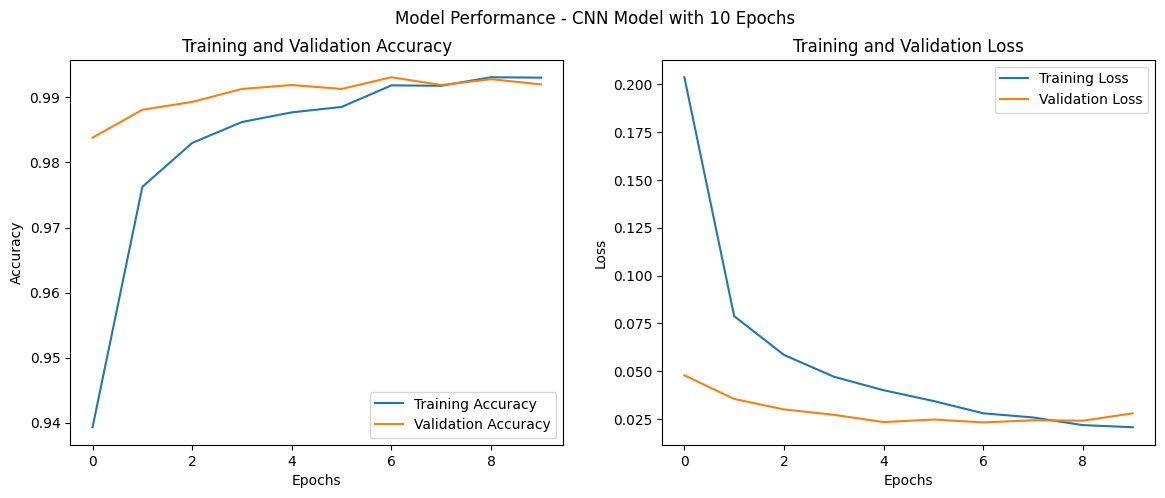

In [86]:
# Plotting training and validation accuracy and loss side by side for the CNN model with 10 epochs

# Set up a figure with side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training and validation accuracy
ax1.plot(history_cnn.history['accuracy'], label='Training Accuracy')
ax1.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()

# Training and validation loss
ax2.plot(history_cnn.history['loss'], label='Training Loss')
ax2.plot(history_cnn.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend()

# Display the plots
plt.suptitle('Model Performance - CNN Model with 10 Epochs')
plt.show()



# Overfitting

In [87]:
# Define the custom model architecture
model_overfitting = Sequential([
    Flatten(input_shape=(28, 28)),         # Flatten 28x28 images to 1D
    Dense(128, activation='relu'),         # Hidden layer with 128 units
    Dropout(0.2),                          # Dropout layer to prevent overfitting
    Dense(10, activation='softmax')        # Output layer for 10 classes (digits 0-9)
])


# Compile the model
model_overfitting.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 10 epochs
history = model_overfitting.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8587 - loss: 0.4839 - val_accuracy: 0.9600 - val_loss: 0.1356
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9558 - loss: 0.1481 - val_accuracy: 0.9681 - val_loss: 0.1013
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9678 - loss: 0.1053 - val_accuracy: 0.9735 - val_loss: 0.0889
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9732 - loss: 0.0853 - val_accuracy: 0.9774 - val_loss: 0.0760
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9782 - loss: 0.0679 - val_accuracy: 0.9782 - val_loss: 0.0727
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9815 - loss: 0.0609 - val_accuracy: 0.9792 - val_loss: 0.0709
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9825 - loss: 0.0563 - val_accuracy: 0.9786 - val_loss: 0.0715
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9830 - loss: 0.05

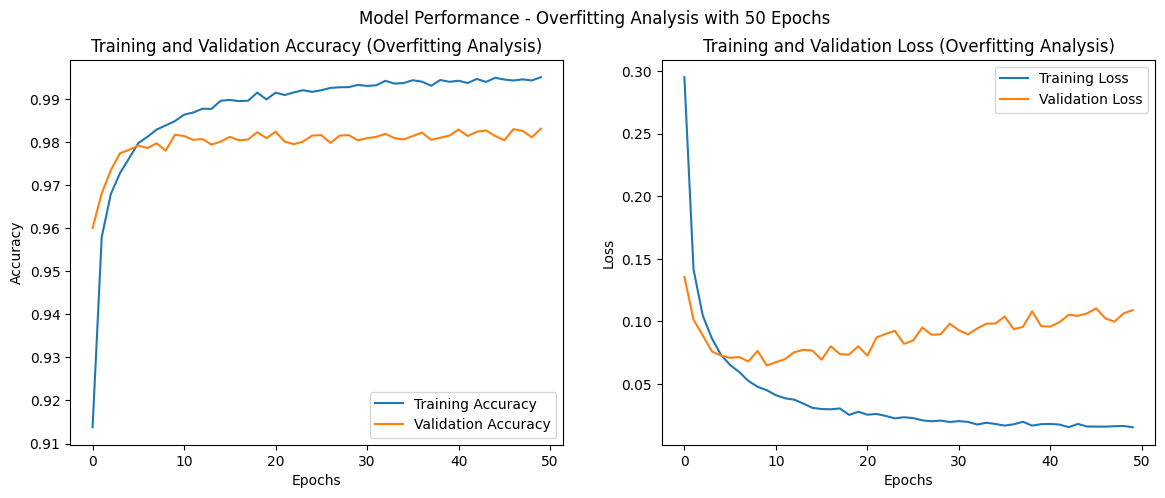

In [88]:
# Plotting training and validation accuracy and loss side by side to observe overfitting in the model trained for 50 epochs

# Set up a figure with side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training and validation accuracy
ax1.plot(history_overfitting.history['accuracy'], label='Training Accuracy')
ax1.plot(history_overfitting.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy (Overfitting Analysis)')
ax1.legend()

# Training and validation loss
ax2.plot(history_overfitting.history['loss'], label='Training Loss')
ax2.plot(history_overfitting.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss (Overfitting Analysis)')
ax2.legend()

# Display the plots
plt.suptitle('Model Performance - Overfitting Analysis with 50 Epochs')
plt.show()



# Experiment with different configurations


In [89]:
# Configuration 1: Larger hidden layer and higher dropout
model_large = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model_large.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large = model_large.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8705 - loss: 0.4412 - val_accuracy: 0.9642 - val_loss: 0.1226
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9583 - loss: 0.1368 - val_accuracy: 0.9728 - val_loss: 0.0872
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9700 - loss: 0.0964 - val_accuracy: 0.9760 - val_loss: 0.0785
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9769 - loss: 0.0732 - val_accuracy: 0.9769 - val_loss: 0.0737
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9806 - loss: 0.0610 - val_accuracy: 0.9810 - val_loss: 0.0639
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9825 - loss: 0.0532 - val_accuracy: 0.9802 - val_loss: 0.0664
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9839 - loss: 0.0489 - val_accuracy: 0.9806 - val_loss: 0.0663
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9862 - loss: 0

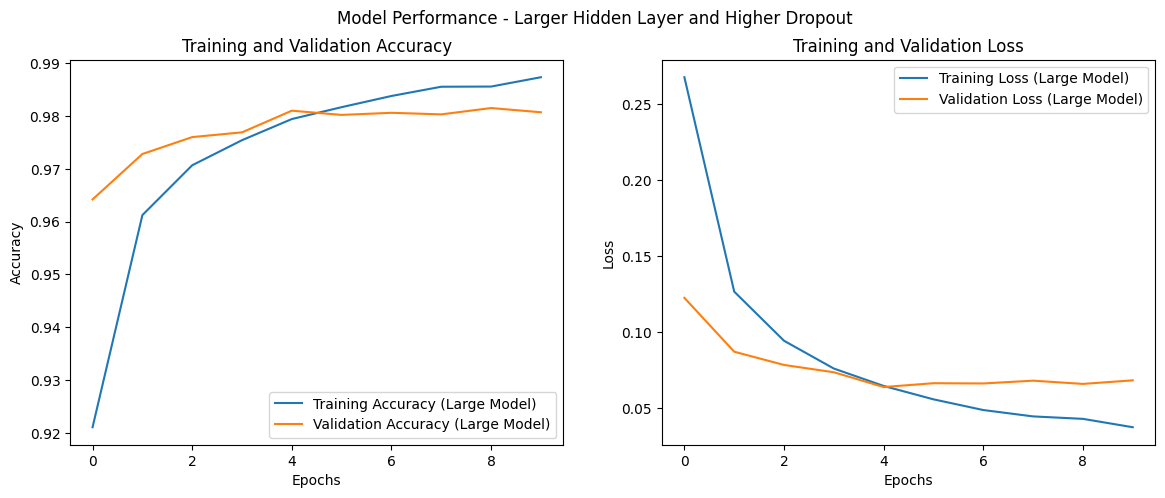

In [90]:
# Plotting the training and validation accuracy and loss side-by-side for Configuration 1 (Larger Model with Higher Dropout)

# Set up a figure with side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training and validation accuracy
ax1.plot(history_large.history['accuracy'], label='Training Accuracy (Large Model)')
ax1.plot(history_large.history['val_accuracy'], label='Validation Accuracy (Large Model)')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()

# Training and validation loss
ax2.plot(history_large.history['loss'], label='Training Loss (Large Model)')
ax2.plot(history_large.history['val_loss'], label='Validation Loss (Large Model)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend()

# Display the plots
plt.suptitle('Model Performance - Larger Hidden Layer and Higher Dropout')
plt.show()


In [91]:
# Configuration 2: Smaller hidden layer with different optimizer
model_small_sgd = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model_small_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_small_sgd = model_small_sgd.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6396 - loss: 1.2020 - val_accuracy: 0.9016 - val_loss: 0.3822
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8730 - loss: 0.4444 - val_accuracy: 0.9161 - val_loss: 0.3059
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8950 - loss: 0.3682 - val_accuracy: 0.9245 - val_loss: 0.2708
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9045 - loss: 0.3310 - val_accuracy: 0.9309 - val_loss: 0.2460
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9141 - loss: 0.2956 - val_accuracy: 0.9366 - val_loss: 0.2280
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9182 - loss: 0.2839 - val_accuracy: 0.9377 - val_loss: 0.2152
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9244 - loss: 0.2610 - val_accuracy: 0.9429 - val_loss: 0.2003
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9294 - loss: 0.2412 - 

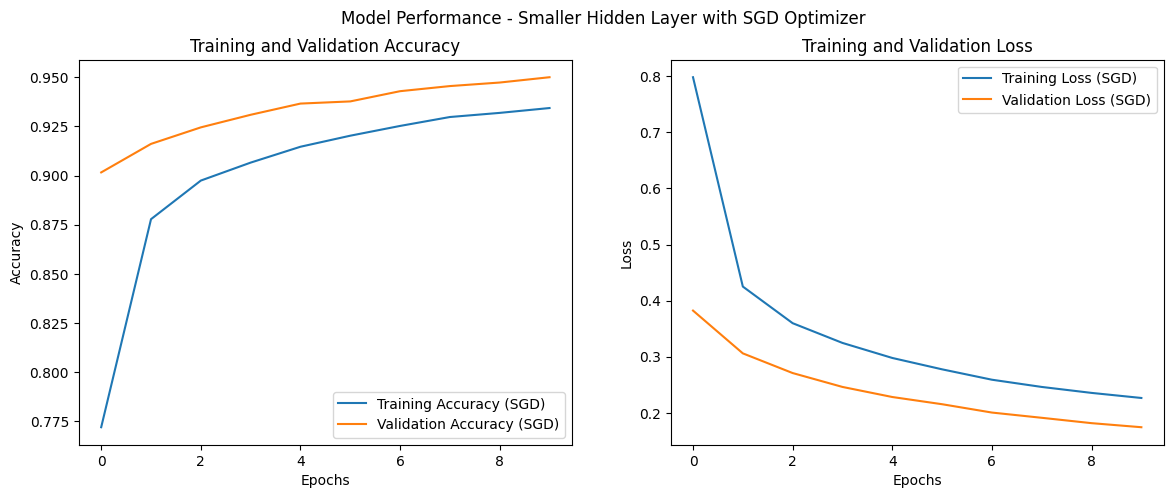

In [92]:
# Plotting the training and validation accuracy and loss side-by-side for Configuration 2 (Smaller hidden layer with SGD optimizer)

# Set up a figure with side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training and validation accuracy
ax1.plot(history_small_sgd.history['accuracy'], label='Training Accuracy (SGD)')
ax1.plot(history_small_sgd.history['val_accuracy'], label='Validation Accuracy (SGD)')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()

# Training and validation loss
ax2.plot(history_small_sgd.history['loss'], label='Training Loss (SGD)')
ax2.plot(history_small_sgd.history['val_loss'], label='Validation Loss (SGD)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend()

# Display the plots
plt.suptitle('Model Performance - Smaller Hidden Layer with SGD Optimizer')
plt.show()


In [93]:
# Configuration 3: Adding an additional hidden layer
model_two_hidden = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model_two_hidden.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_two_hidden = model_two_hidden.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8482 - loss: 0.4953 - val_accuracy: 0.9609 - val_loss: 0.1222
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9612 - loss: 0.1278 - val_accuracy: 0.9721 - val_loss: 0.0904
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9732 - loss: 0.0892 - val_accuracy: 0.9703 - val_loss: 0.0941
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9795 - loss: 0.0664 - val_accuracy: 0.9782 - val_loss: 0.0732
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9824 - loss: 0.0560 - val_accuracy: 0.9771 - val_loss: 0.0769
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9857 - loss: 0.0441 - val_accuracy: 0.9783 - val_loss: 0.0789
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9873 - loss: 0.0403 - val_accuracy: 0.9806 - val_loss: 0.0743
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9892 - loss: 0.031

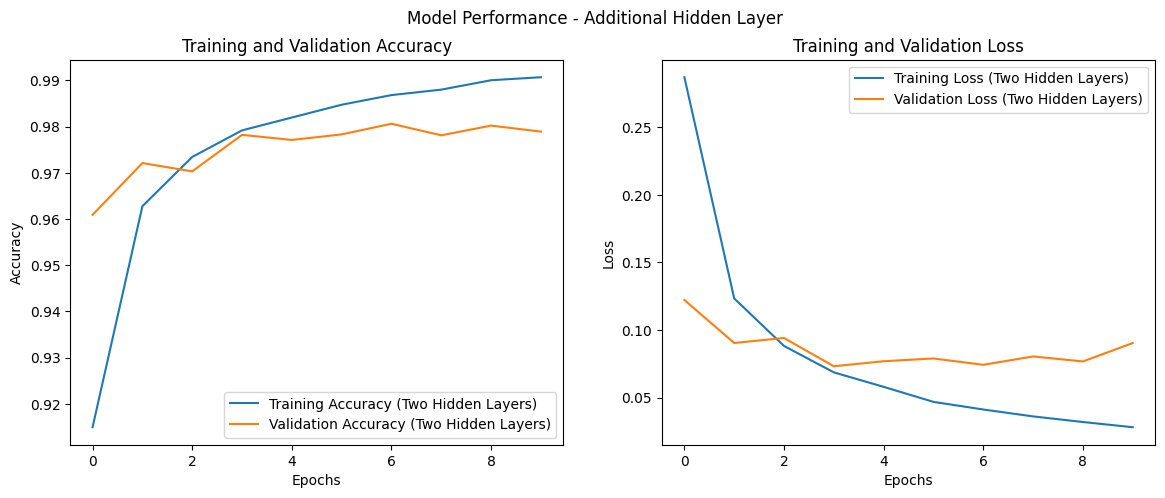

In [94]:
# Plotting the training and validation accuracy and loss side-by-side for Configuration 3 (Additional hidden layer)

# Set up a figure with side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training and validation accuracy
ax1.plot(history_two_hidden.history['accuracy'], label='Training Accuracy (Two Hidden Layers)')
ax1.plot(history_two_hidden.history['val_accuracy'], label='Validation Accuracy (Two Hidden Layers)')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()

# Training and validation loss
ax2.plot(history_two_hidden.history['loss'], label='Training Loss (Two Hidden Layers)')
ax2.plot(history_two_hidden.history['val_loss'], label='Validation Loss (Two Hidden Layers)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend()

# Display the plots
plt.suptitle('Model Performance - Additional Hidden Layer')
plt.show()


# Predicting for the Custom Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Accuracy on the custom test set: 88.89%


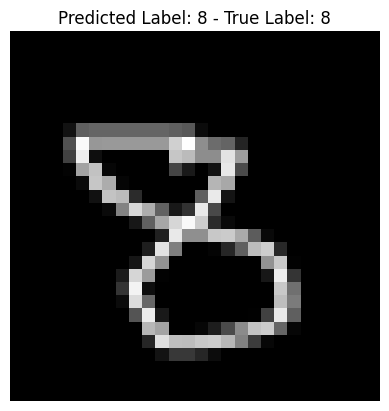

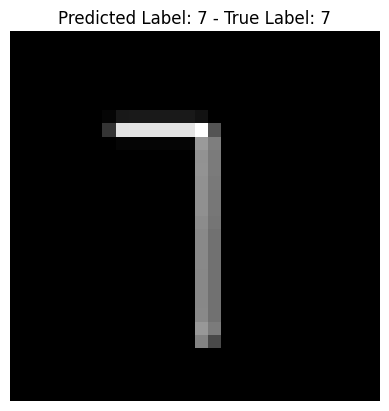

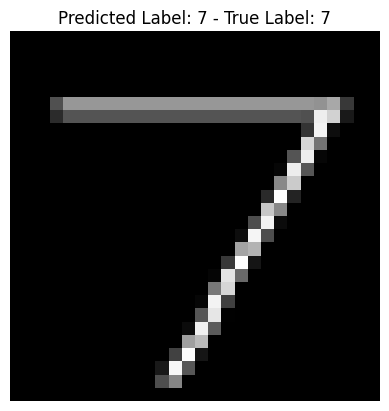

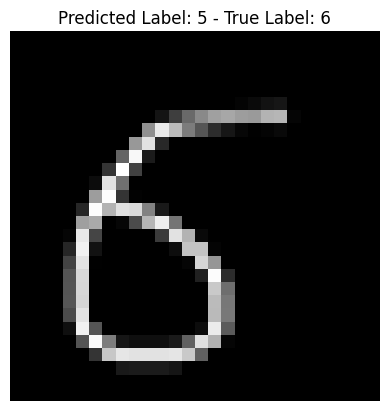

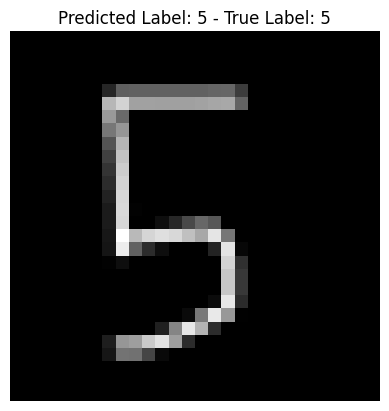

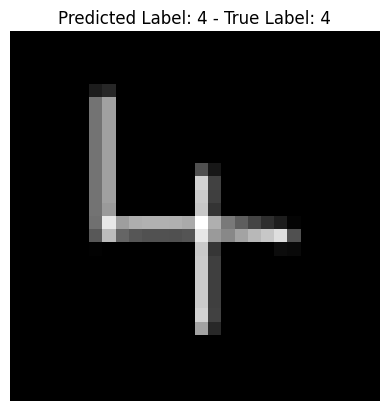

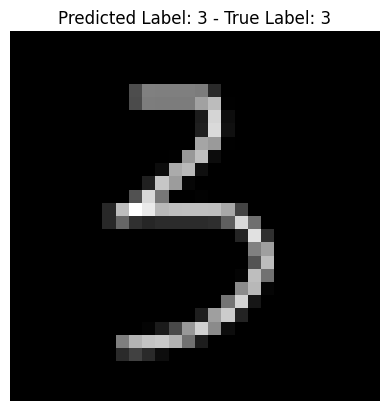

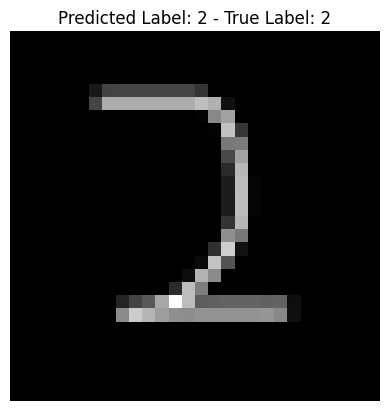

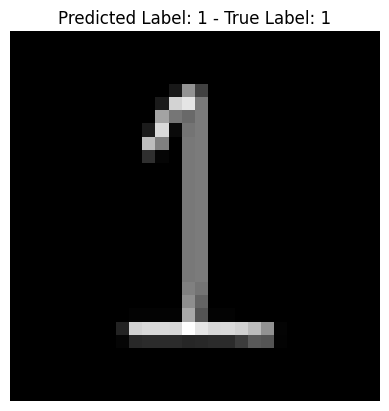

In [95]:
# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/Teaching/TME_6015/Assignment_1'

for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    if os.path.isdir(folder_path):  # Check if path is a directory (label folder)
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder_path, filename)

                # Load and preprocess the image without thresholding
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize((28, 28))               # Resize to 28x28 pixels
                img_array = np.array(img) / 255.0        # Normalize to [0, 1] range
                img_array = img_array.reshape(28, 28, 1) # Reshape to add channel dimension

                custom_images.append(img_array)
                custom_labels.append(int(folder_name))  # Folder name as label

# Convert lists to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Make predictions on custom images
predictions_cnn = model_cnn.predict(custom_images)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

# Calculate accuracy on custom test set
accuracy_cnn = np.mean(predicted_labels_cnn == custom_labels)
print(f"Accuracy on the custom test set: {accuracy_cnn * 100:.2f}%")

# Display each custom image with its predicted and true label
for i in range(len(custom_images)):
    plt.imshow(custom_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Label: {predicted_labels_cnn[i]} - True Label: {custom_labels[i]}')
    plt.axis('off')
    plt.show()